<a href="https://colab.research.google.com/github/Karuni001/Elite-Tech-intern/blob/main/Sentiment_analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Sentiment Analysis using NLP

In [2]:
import kagglehub
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
# Download Dataset
path = kagglehub.dataset_download("ashpalsingh1525/imdb-movies-dataset")
print("Dataset Path:", path)

100%|██████████| 2.84M/2.84M [00:00<00:00, 133MB/s]

Extracting files...
Dataset Path: /root/.cache/kagglehub/datasets/ashpalsingh1525/imdb-movies-dataset/versions/1


In [7]:
import os

# List files in the dataset directory
files = os.listdir(path)
print("Files in dataset directory:", files)

Files in dataset directory: ['imdb_movies.csv']


In [12]:
# Load the Dataset (Updated filename)
file_path = f"{path}/imdb_movies.csv"
df = pd.read_csv(file_path)

In [14]:
print(df.columns)

Index(['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title',
       'status', 'orig_lang', 'budget_x', 'revenue', 'country'],
      dtype='object')


In [26]:
print(df.head())

                                            overview  score Sentiment
0  After dominating the boxing world, Adonis Cree...   73.0  Positive
1  Set more than a decade after the events of the...   78.0  Positive
2  While working underground to fix a water main,...   76.0  Positive
3  Through a series of unfortunate events, three ...   70.0  Positive
4  Good-hearted teenager William always lived in ...   61.0  Positive


In [17]:
# Data Preprocessing
df = df[['overview', 'score']]  # Select relevant columns
df.dropna(inplace=True)  # Remove missing values

In [18]:
# Convert Ratings into Positive & Negative Sentiments
df['Sentiment'] = df['score'].apply(lambda x: 'Positive' if x >= 6 else 'Negative')

In [28]:
import nltk
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Ensure stopwords are also available

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Function to Clean Text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'\d+', '', text)  # Remove numbers
    words = word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

In [44]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data

# Define text cleaning function
def clean_text(text):
    if isinstance(text, str):  # Ensure it's a string
        text = text.lower()  # Lowercase
        text = re.sub(r'\W', ' ', text)  # Remove special characters
        text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
        words = word_tokenize(text)  # Tokenize
        words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
        return ' '.join(words)
    return ''  # Return empty string for missing values

# Apply text cleaning to the 'overview' column
df['Cleaned_Text'] = df['overview'].apply(clean_text)

# Verify
print(df[['overview', 'Cleaned_Text']].head())  # Ensure column is created

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                            overview  \
0  After dominating the boxing world, Adonis Cree...   
1  Set more than a decade after the events of the...   
2  While working underground to fix a water main,...   
3  Through a series of unfortunate events, three ...   
4  Good-hearted teenager William always lived in ...   

                                        Cleaned_Text  
0  dominating boxing world adonis creed thriving ...  
1  set decade events first film learn story sully...  
2  working underground fix water main brooklyn pl...  
3  series unfortunate events three mummies end pr...  
4  good hearted teenager william always lived hop...  


In [45]:
# Convert text data into numerical form using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit features to 5000 for efficiency
X = vectorizer.fit_transform(df['Cleaned_Text'])  # Transform text

# Encode Sentiments (Convert 'Positive' → 1, 'Negative' → 0)
df['Sentiment_Label'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

# Define features and target variable
y = df['Sentiment_Label']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 8142
Test set size: 2036


In [47]:
# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

print("Model Training Complete! ✅")

Model Training Complete! ✅


In [52]:
# Make predictions
y_pred = model.predict(X_test)

# Print Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9828

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.98      1.00      0.99      2001

    accuracy                           0.98      2036
   macro avg       0.49      0.50      0.50      2036
weighted avg       0.97      0.98      0.97      2036



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-51-34fa26e5c7a1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette='coolwarm')


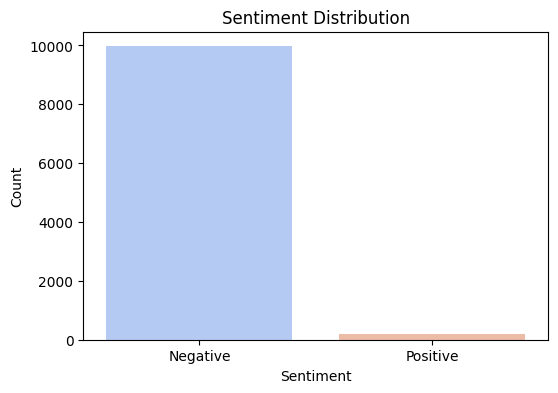

------------------------------


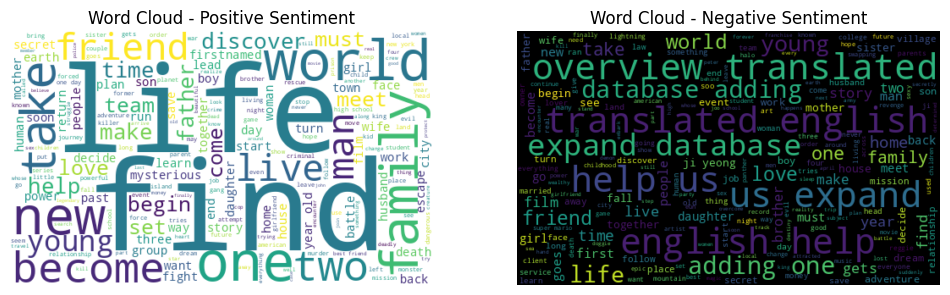

------------------------------


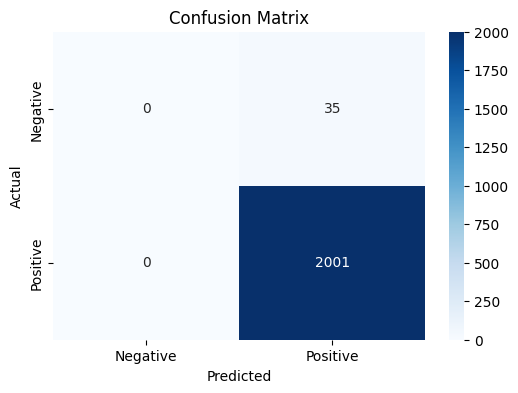

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

# 📌 1️⃣ Sentiment Distribution - Bar Chart
plt.figure(figsize=(6,4))
sns.countplot(x=df['Sentiment'], palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

# 📌 2️⃣ Word Cloud of Most Frequent Words (for positive & negative reviews)
# Ensure Sentiment_Label is used for filtering (it's numerical: 1 for Positive, 0 for Negative)
positive_text = " ".join(df[df['Sentiment_Label'] == 1]['Cleaned_Text'].astype(str))
negative_text = " ".join(df[df['Sentiment_Label'] == 0]['Cleaned_Text'].astype(str))

plt.figure(figsize=(12, 5))
print("------------------------------")
# Word Cloud for Positive Sentiments
plt.subplot(1,2,1)
wordcloud_pos = WordCloud(width=500, height=300, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Positive Sentiment")

# Word Cloud for Negative Sentiments
plt.subplot(1,2,2)
wordcloud_neg = WordCloud(width=500, height=300, background_color='black').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - Negative Sentiment")

plt.show()
print("------------------------------")
# 📌 3️⃣ Confusion Matrix (Heatmap)
y_pred = model.predict(X_test)  # Get predictions
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()